Zadanie 1 podpunkt 1

In [1]:
import random
import math
import numpy as np
import pandas as pd

In [2]:
x = np.random.randint(10, size=10)
y = np.random.randint(10, size=10)

Dzięki bibliotece numpy,generuje dwie losowe macierze jedno kolumnowe( x oraz y) z 10 obserwacjami liczbowymi z zakresu 0-9, które zostaną połączone, za pomocą funkcji column_stack,otrzymując listę z dziesięcioma parami liczb naturalnych. Za każdym wywołaniem kodu liczby w macierzy się zmieniają.

In [3]:
x = np.random.randint(10, size=10)
y = np.random.randint(10, size=10)
mojalista = np.column_stack((x,y))
mojalista

array([[1, 7],
       [8, 0],
       [7, 6],
       [7, 5],
       [0, 1],
       [1, 8],
       [5, 2],
       [7, 3],
       [0, 2],
       [0, 5]])

Zadanie 1 podpunkt 2

In [4]:
nowamacierz = x ** y # wykorzystując wcześniej zaimplementowanej listy wykonuje proste podniesienie x do potęgi y
nowamacierz2 = np.column_stack((nowamacierz,y)) # W zależności od zrozumienia wymagań zadania ta kolumna może okazać się zbędna
nowamacierz2 # Wyświetlam macierz x^y , oraz y

array([[     1,      7],
       [     1,      0],
       [117649,      6],
       [ 16807,      5],
       [     0,      1],
       [     1,      8],
       [    25,      2],
       [   343,      3],
       [     0,      2],
       [     0,      5]])

Zadanie 2 podpunkt pierwszy
Stworzyć data frame który będzie miał pierwsze elementy z par zadania powyżej jako pierwszą kolumnę, a drugi element z pary jako drugą kolumnę. 

In [5]:
dfstack = pd.DataFrame(mojalista,columns=["x","y"])
dfstack

,x,y
0,1,7
1,8,0
2,7,6
3,7,5
4,0,1
5,1,8
6,5,2
7,7,3
8,0,2
9,0,5


Zadanie 2 podpunkt drugi
Dodać trzecią kolumnę która będzie potęgą tak jak w zadaniu 1. Uwaga: kolumna ta powinna być wyliczona z kolumny drugiej i trzeciej, a nie wzięta z listy z zadania 1.

In [6]:
dfstack2 = np.column_stack((mojalista,nowamacierz))
dfstack2 = pd.DataFrame(dfstack2,columns=["x","y","x^y"])
dfstack2["x^y"] = dfstack2.x ** dfstack2.y
dfstack2

,x,y,x^y
0,1,7,1
1,8,0,1
2,7,6,117649
3,7,5,16807
4,0,1,0
5,1,8,1
6,5,2,25
7,7,3,343
8,0,2,0
9,0,5,0


Third task point 1, loading data and set the names of variables, output first ten rows.

In [7]:
vine = pd.read_csv("D:\\test\\wine_data.txt",
names = ["class","Alcohol", "Malic acid ","Ash" ,"Alcalinity of ash" ,
"Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols" ,"Proanthocyanins" ,"Color intensity" ,"Hue" ,"OD280/OD315 of diluted wines" ,"Proline"])
vine.head(10)                   

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Selecting X variables( without class) and y variable(class)

In [8]:
X = vine.drop(["class"],axis =1)
y = vine["class"]

Divide into a traning and testing set using train_test_split method

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
np.random.seed(42)

Now i am using loop function used in class, start with best accuracy score = 0, and empty parameters

In [11]:
best_score = 0
parameters = {}

In [12]:
for depth in range (1,11):
    for min_split in range(2,11):
        for min_leaf in range(1,21):
            for criterion in ["gini", "entropy"]:
                regressor = DecisionTreeClassifier(max_depth = depth,
                                              min_samples_split = min_split,
                                              min_samples_leaf = min_leaf,
                                              criterion = criterion)
                scores = cross_val_score(regressor, X_train, y_train, cv = 3)
            #print("MSE: {} (std {})".format(scores.mean(), scores.std()))
            if scores.mean() > best_score:
                print("New best parameters!")
                parameters["best_depth"] = depth
                parameters["best_min_split"] = min_split
                parameters["best_min_leaf"] = min_leaf
                parameters["best_criterion"] = criterion
                best_score = scores.mean()
                print("Accuracy: {}".format(scores.mean()))
                print("max_depth: {}, min_samples_split: {}, min_samples_leaf: {}, criterion: {}".format(depth, 
                                                                                                             min_split, 
                                                                                                             min_leaf, 
                                                                                                             criterion))

New best parameters!
Accuracy: 0.6124408983451537
max_depth: 1, min_samples_split: 2, min_samples_leaf: 1, criterion: entropy
New best parameters!
Accuracy: 0.6125886524822696
max_depth: 1, min_samples_split: 2, min_samples_leaf: 8, criterion: entropy
New best parameters!
Accuracy: 0.619533096926714
max_depth: 1, min_samples_split: 2, min_samples_leaf: 9, criterion: entropy
New best parameters!
Accuracy: 0.8875591016548463
max_depth: 2, min_samples_split: 2, min_samples_leaf: 1, criterion: entropy
New best parameters!
Accuracy: 0.9153368794326241
max_depth: 2, min_samples_split: 2, min_samples_leaf: 4, criterion: entropy
New best parameters!
Accuracy: 0.9156323877068558
max_depth: 3, min_samples_split: 4, min_samples_leaf: 2, criterion: entropy
New best parameters!
Accuracy: 0.936613475177305
max_depth: 3, min_samples_split: 5, min_samples_leaf: 2, criterion: entropy
New best parameters!
Accuracy: 0.9434101654846335
max_depth: 8, min_samples_split: 2, min_samples_leaf: 1, criterion: en

The highest accuracy we have when:
The maximum depth of the tree is equal 8.
The minimum number of samples required to split an internal node is equal 2. 
The minimum number of samples required to be at a leaf node is equal 1. 
The best model we have when we use entropy criterion. 
We have the best model with accuracy equal over 94%.If we dont set np.random.seed(42) or another number inside, the results will be always different.

In [13]:
parameters

{'best_depth': 8,
 'best_min_split': 2,
 'best_min_leaf': 1,
 'best_criterion': 'entropy'}

Assign the best observed parameters to the variable

In [14]:
clf_dtc = DecisionTreeClassifier(criterion = parameters["best_criterion"], max_depth = parameters['best_depth'], 
                                 min_samples_split = parameters["best_min_split"], 
                                 min_samples_leaf = parameters["best_min_leaf"])

Let's train our classifier

In [15]:
clf_dtc.fit(X = X_train, y = y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Prediction

In [16]:
prediction_dtc = clf_dtc.predict(X_test)
prediction_dtc

array([1, 1, 2, 1, 2, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1], dtype=int64)

In [17]:
results = pd.DataFrame({"y_true":y_test, "y_predicted":prediction_dtc},y_test.index)

y predicted vs y true dataframe below

In [18]:
results

,y_predicted,y_true
19,1,1
45,1,1
140,2,3
30,1,1
67,2,2
16,1,1
119,2,2
174,3,3
109,2,2
141,1,3


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Visualize confusion matrix with true and predict observations

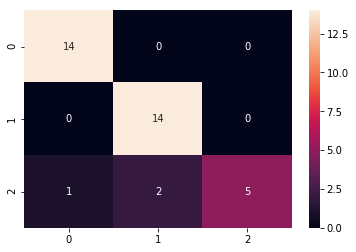

In [20]:
cm_dtc = confusion_matrix(y_true = results["y_true"], y_pred = results["y_predicted"])
sns.heatmap(cm_dtc, annot = True, fmt="d")

Fourth task

In [21]:
whitewine = pd.read_csv("D:\\test\\winequality-white.csv",sep=";")

In [22]:
X = whitewine.drop(["quality"],axis =1)
y = whitewine["quality"]

Now we can see that in the dataset there are no answers with 0,1,2 and 10 quality scores. The worst quality score is equal to 3 and the best equal 9 with 5 observations.

In [23]:
whitewine.groupby(['quality']).size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

In [24]:
whitewine.isnull().any()
# whitewine.isnull().sum() sum na,only when i have missing values in dataset

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

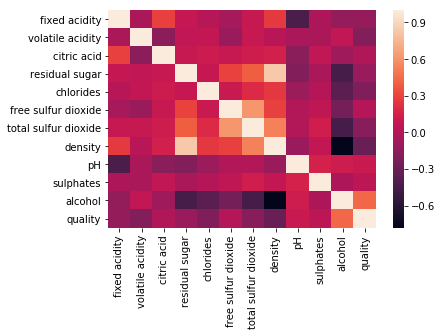

In [25]:
sns.heatmap(whitewine.corr())
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logisticRegr = LogisticRegression()

In [29]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
predictions = logisticRegr.predict(X_test)

In [31]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.5142857142857142


My logistic regression model has around 51% accuracy. We need to remember that we had to predict a class with seven values(3-9). I think that would me much better when we divide quality scores to 2 or 3 specific categories

In [32]:
scores = cross_val_score(logisticRegr, X, y, scoring='accuracy', cv=5)
scores
scores.mean()

0.5151447886709889